In [ ]:
import os
import requests
import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

Load data in from .mat file as specified by the paper.

https://arxiv.org/abs/1702.05373

https://www.tensorflow.org/datasets/catalog/emnist#emnistdigits
        Arguments:
            mat_file_path: path to the .mat, should be in sample/

        Optional Arguments:
            width: specified width
            height: specified height
            max_: the max number of samples to load
            verbose: enable verbose printing

        Returns:
            A tuple of training and test data, and the mapping for class code to ascii value,
            in the following format:
                - ((training_images, training_labels), (testing_images, testing_labels), mapping)


In [ ]:
with open("matlab.zip", "wb") as f:
 f.write(response.content)
with zipfile.ZipFile("matlab.zip", "r") as zip_ref:
 zip_ref.extractall(".")
os.remove("matlab.zip")

In [ ]:
def load_emnist(file_path):
  data = loadmat(file_path)
  X = data['dataset'][0][0][0][0][0][0]
  y = data['dataset'][0][0][0][0][0][1]
  X = X.reshape(X.shape[0], 28, 28, 1).transpose([0, 2, 1, 3])
  y = y.reshape(-1)
  return X, y

In [ ]:
X, y = load_emnist("matlab/emnist-digits.mat")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,
28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
from keras.callbacks import EarlyStopping
import time
early_stopping = EarlyStopping(monitor="val_loss", patience=1, verbose=1)
model

In [ ]:
model.save("emnist_digits_model.h5")

In [ ]:
from keras.models import load_model
model = load_model("emnist_digits_model.h5")

In [ ]:
num_samples = 2
random_indices=np.random.choice(X_test.shape[0],size=num_samples,replace=False)
plt.show()

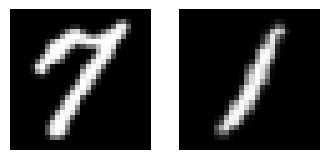

In [ ]:
fig, axes = plt.subplots(1, num_samples, figsize=(4, 2))
for i, idx in enumerate(random_indices):
  axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
  axes[i].axis('off')
plt.show()

In [ ]:
selected_images = X_test[random_indices]
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)


1/1 [==============================] - 0s 33ms/step
Predicted classes: [0 0]
